In [ ]:
%autosave 10

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
# Import the dataset
df = pd.read_csv(r'F:\Python\technocolabs\Task 2\cleaned_data.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0  798fc410-45c1      20000    2          2         1   24      2      2   
1  8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2  85698822-43f5      90000    2          2         2   34      0      0   
3  0737c11b-be42      50000    2          2         1   37      0      0   
4  3b7f77cc-dbc0      50000    1          2         1   57     -1      0   

   PAY_3  PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     -1     -1  ...         0         0         0         0   
1      0      0  ...      1000      1000         0      2000   
2      0      0  ...      1000      1000      1000      5000   
3      0      0  ...      1200      1100      1069      1000   
4     -1      0  ...     10000      9000       689       679   

   default payment next month  EDUCATION_CAT  graduate school  high school  \
0                           1     university                0            0   
1                           1     university                0            0   
2                           0     university                0            0   
3                           0     university                0            0   
4                           0     university                0            0   

   others  university  
0       0           1  
1       0           1  
2       0           1  
3       0           1  
4       0           1  

[5 rows x 30 columns]

In [4]:
df["default payment next month"].mean()

0.2217971797179718

In [6]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)
log_model.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [9]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
correct_pred = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [12]:
pre_prob=log_model.predict_proba(X_test)
pre_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [13]:
prob_sum = np.sum(pre_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
prob_sum.shape

(5333,)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [16]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test,pre_prob[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


In [18]:
fpr,tpr,thres=roc_curve(y_test,pre_prob[:,1])

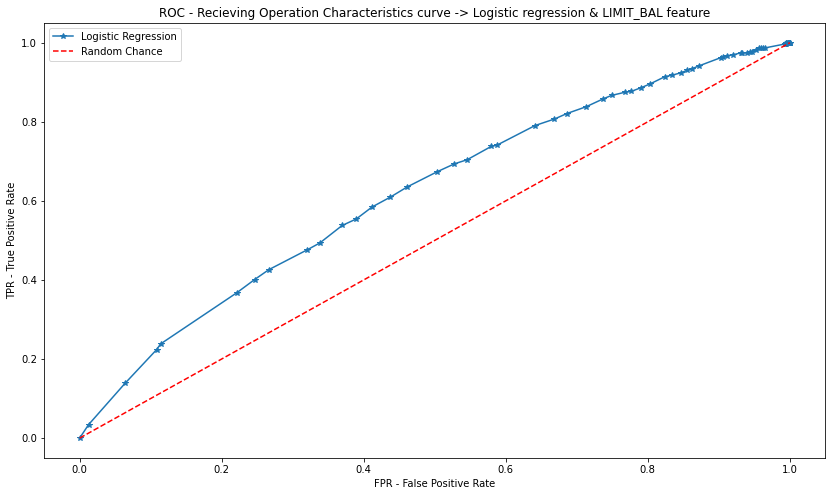

In [19]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"*-")
plt.plot([0,1],[0,1],'r--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [20]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support
precision,recall,thresh1=precision_recall_curve(y_test,pre_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

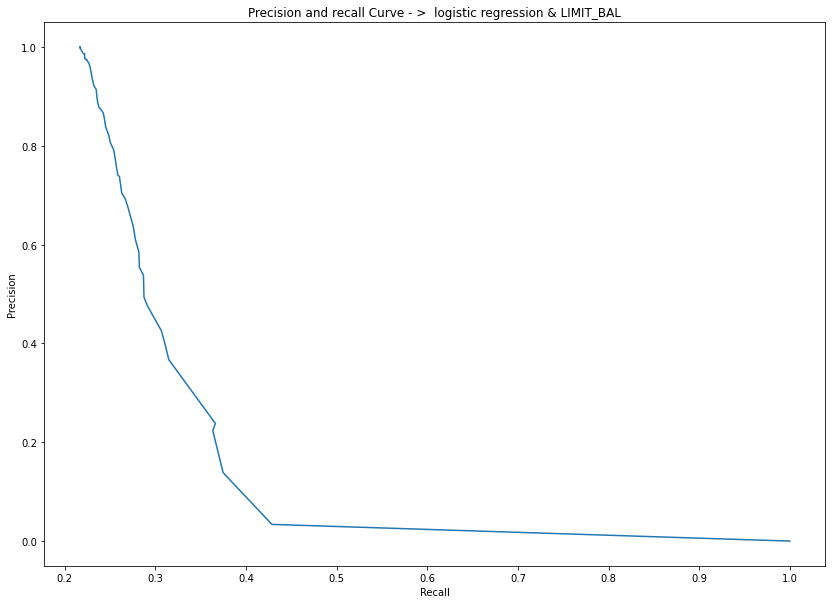

In [21]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [23]:
from sklearn.metrics import auc
auc(recall,precision)

0.31566964427378624

In [25]:
roc_auc_score(y_test,pre_prob[:,1])


0.6201990844642832

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [26]:
xtrain_pred=log_model.predict(X_train)
xtrain_pred_proba=log_model.predict_proba(X_train)
xtrain_pred_proba

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [27]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
